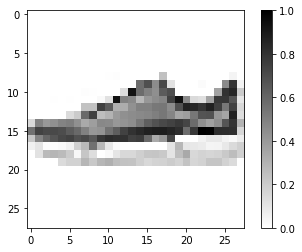

In [1]:
import tensorflow as tf 
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

#get Train data    
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

##class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot’] 

#normalize the data
train_images = train_images/255.0  
test_images = test_images/255.0 

import matplotlib.pyplot as plt 
plt.gca().grid(False) 
plt.imshow(test_images[9], cmap=plt.cm.binary) 
plt.colorbar() 
plt.show() 


In [37]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
##model.fit(train_images, train_labels, epochs=20)
model.fit(train_images, train_labels, epochs=50, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/50
  20/1875 [..............................] - ETA: 9s - loss: 1.9380 - accuracy: 0.3422  

2022-09-14 14:56:58.061706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.5623 - accuracy: 0.8012
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4090 - accuracy: 0.8518
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3714 - accuracy: 0.8652
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3506 - accuracy: 0.8705
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3330 - accuracy: 0.8774
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3204 - accuracy: 0.8828
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3096 - accuracy: 0.8855
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3011 - accuracy: 0.8889
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2931 - accuracy: 0.8916
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2838 - accura

2022-09-14 15:04:55.502902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.8965


2022-09-14 15:04:56.846961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[2.2476055e-15 4.6952186e-18 3.5573143e-19 7.0982622e-21 7.1693650e-20
 1.3006375e-07 1.2970510e-18 1.7443266e-05 3.9259822e-17 9.9998248e-01]
9


In [39]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot'] 

# Check the model for a specific image
image_num = 6 
print(("Expected label: ", class_names[test_labels[image_num]]))



('Expected label: ', 'Coat')


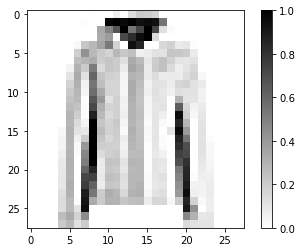

Predictions for image: [1.3617517e-16 8.0447752e-26 1.6347738e-06 9.4210530e-22 9.9999833e-01
 0.0000000e+00 2.4612201e-10 0.0000000e+00 2.5549478e-28 0.0000000e+00]


In [40]:
import matplotlib.pyplot as plt 
plt.gca().grid(False) 
plt.imshow(test_images[image_num], cmap=plt.cm.binary) 
plt.colorbar() 
plt.show() 

##imgplot = plt.imshow(test_images[image_num], cmap=plt.cm.binary)

#prediction
predictions = model.predict(test_images) 
print("Predictions for image:", predictions[image_num]) 